## Сборный проект


### Описание проекта

У нас есть данные магазина «Стримчик», который продаёт по всему миру компьютерные игры, за 2016 год. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных

У нас есть следующие данные:

- name — название игры;
- platform — платформа;
- year_of_release — год выпуска;
- genre — жанр игры;
- na_sales — продажи в Северной Америке (миллионы проданных копий);
- eu_sales — продажи в Европе (миллионы проданных копий);
- jp_sales — продажи в Японии (миллионы проданных копий);
- other_sales — продажи в других странах (миллионы проданных копий);
- critic_score — оценка критиков (максимум 100);
- user_score — оценка пользователей (максимум 10);
- rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Задачи

В этом проекте необходимо выполнить следующие задачи:

- Подготовить данные;
- Провести исследовательский анализ данных;
- Составить портрет пользователя каждого региона;
- Проверить гипотезы:
    + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    + Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


### Оглавление

1. [Знакомство с данными](#id-1)
2. [Подготовка данных](#id-2)
3. [Исследовательский анализ данных](#id-3)
4. [Составление портрета пользователя каждого региона](#id-4)
5. [Проверка гипотез](#id-5)
6. [Общий вывод](#id-6)

<div id='id-1'/>

### Знакомство с данными

Начнем работу с данными с выведения первых 10 строк датасета:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats as st

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Теперь посмотрим на данные с помощью методов **.info()** и **.describe()**:

In [2]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Уже можно сделать определенные выводы:

- В данных есть пропуски, особенно много их в столбцах *Critic_Score, User_Score* и *Rating*;
- Необходимо заменить тип данных в столбцах *Year_of_Release, User_Score*;
- Судя по всему, в Японии продаж было не так много - медианное значение равно 0.

<div id='id-2'/>

### Подготовка данных

#### Переименование столбцов

Начнем предобработку данных с переименования столбцов:

In [3]:
data.columns = data.columns.str.lower()

#### Обработка пропусков

Подсчитаем количество пропусков:

In [4]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Больше всего пропусков в столбце *critic_score* - около 51.3% пропущенных значений, также много пропусков в столбцах *user_score* и *rating* - 40% и 40.47 соответственно.

В столбцах *name* и *genre* у нас по 2 пропуска: посмотрим, связаны они или нет.

In [5]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Да, сведения о жанре у нас отсуствуют там, где нет данных о названии игры. Удалим эти две строки.

In [6]:
data = data.drop(data[data['name'].isna()].index)

Также у нас нет данных о годе выпуска игры для 1.6% данных - такое количество некритично для качества анализа, можно удалить их:

In [7]:
data = data.drop(data[data['year_of_release'].isna()].index)

Теперь обработаем пропуски в столбцах *critic_score*, *user_score* и *rating*.

Судя по первым 10 строкам датасета, можно предположить, что нет данных об оценках критиков и пользователей и рейтинге для старых игр. Проверим это с помощью методов **.query()** и **.value_counts()**:

In [8]:
data.query('critic_score.isna() or user_score.isna() or rating.isna()')['year_of_release'].value_counts()

2009.0    782
2010.0    759
2008.0    719
2011.0    650
2007.0    505
2015.0    394
2006.0    389
1998.0    354
2012.0    340
2014.0    324
1999.0    302
2005.0    287
2016.0    285
2013.0    277
1997.0    275
1996.0    256
1995.0    219
2000.0    209
2004.0    206
2002.0    202
2003.0    193
2001.0    157
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

Как видно, больше всего пропусков у нас в играх 2009 года, в первой десятке по количестве пропусков у нас только один год до 2000: 1998. Поэтому можно исключить версию о том, что пропуски есть в основном в данных о старых играх.   

Вероятнее всего, пропуски появились из-за ошибок при выгрузке из базы данных.  

Так как пропусков очень много, удалить мы из не можем. Учитывая смысл данных в столбцах, приемлемых методов заполнения нет, поэтому оставим как есть.

Перейдем к обработке значений `tbd` в столбце *user_score*. Сначала посмотрим, сколько таких значений присутствует в датасете:

<div class="alert alert-success">
<h1> Комментарий от ревьюера</h1>
Верно мыслишь!) Молодец, что ищешь причины полученных результатов:) Для аналитика это важно:)
</div>

In [9]:
data.query('user_score == "tbd"').shape[0]

2376

Таких значений у нас 2376. Это означает, что для 2376 игр рейтинг еще не известен (tbd значит to be determined). Так как нам надо будет менять тип данных в столбце на более подходящий тип `float`, чтобы мы могли провести анализ данных, лучше заменить такие значения на `NaN`.

In [10]:
data.query('user_score == "tbd"')['platform'].value_counts()

DS      744
Wii     428
GBA     258
PS2     236
XB      146
PSP     118
GC      100
PS3      87
X360     83
3DS      54
PC       49
PS       44
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64

In [11]:
744 / 2376

0.31313131313131315

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.nan) 

#### Замена типов данных

Теперь заменим типы данных в столбцах *year_of_release* и *user_score*:

In [13]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [14]:
data['user_score'] = data['user_score'].astype('float')

Убедимся, что замена типов данных прошла успешно:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Подсчет суммарных продаж по всем регионам

Создадим столбец *total_sales*, куда поместим суммарное количество продаж для каждой игры:

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] 

Выведем на экран первые 10 строк методом **.head()**, чтобы убедиться, что столбец корректно добавлен.

In [17]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,29.68
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,27.84


### Вывод

Была проведена подготовка данных к анализу:
- Привели к нижнему регистру названия столбцов;
- Обработали пропуски там, где это было возможно:
    + В столбцах *name*, *genre* и *year_of_release* удалили пропуски, так как их количество было незначительно;
    + В столбцах *critic_score*, *user_score* и *rating* мы решили оставить данные в первозданном виде, так как пропусков слишком много, чтобы их удалять (51.3%, 40% и 40.47% соответственно).
- Пропуски могли попасть в данные при выгрузке из базы данных в результате ошибки; 
- Чтобы заменить тип данных в столбце *user_score* на `float`, нам пришлось заменить значения 'tbd' - to be determined - на `NaN`;
- Также была произведена замена типа данных в столбце *year_of_release*;
- Мы посчитали суммарное количество продаж для всех регионов и поместили его в столбец *total_sales*.

<div id='id-3'/>

### Исследовательский анализ данных

На этом шаге нужно выполнить следующие задачи и ответить на вопросы:
1. Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не нужно учитывать в работе данные за предыдущие годы.
4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
7. Соотнести выводы с продажами игр на других платформах.
8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

#### Анализ количества игр по годам



Создадим сводную таблицу, в которой будут данные о количестве выпущенных игр по годам.

In [18]:
year_of_release_data = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(year_of_release_data)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим график, чтобы наглядно оценить тенденции:

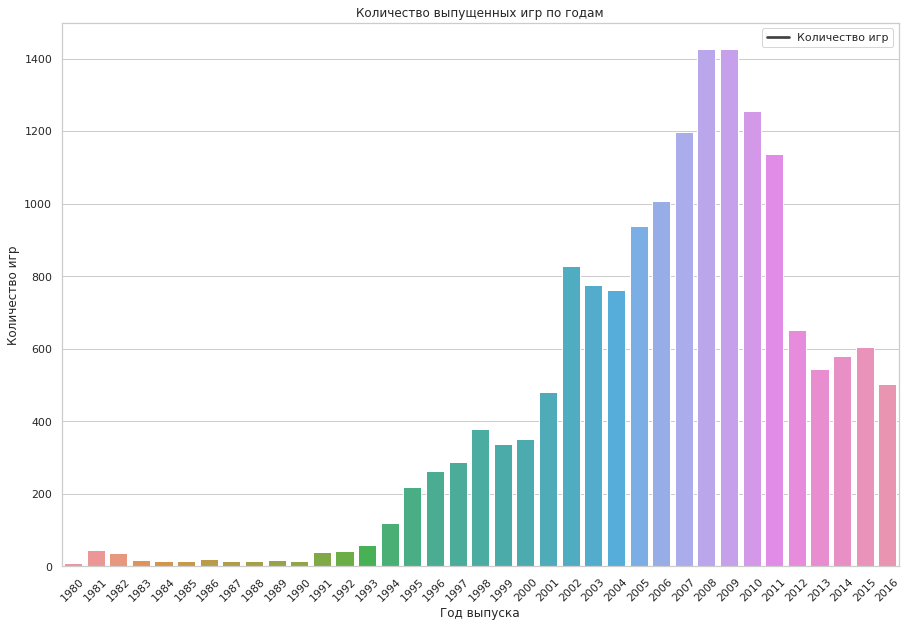

In [19]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.set_style("whitegrid")
sns.barplot(x=year_of_release_data.index, y='name', data=year_of_release_data, dodge=True)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend(['Количество игр'])
plt.xticks(rotation=45)
plt.show()

Пик выпуска игр был в 2008-2009 годах (1427 и 1426 игр соответственно), потом начался постепенный спад в в 2010-2011 годах. В 2012 году количество выпущенных игр резко упало на 42.5% до 653.   

На вопрос *Важны ли данные за все периоды?* сложно ответить однозначно. С одной стороны, полезно видеть динамику за относительно большое количество лет, но, с другой стороны, факторы, которое влияют на рынок, постоянно меняются, поэтому наиболее важными можно считать данные за последние 5 лет (с 2012 года), остальные данные не так важны для составления прогноза на 2017 год.

#### Анализ продаж по платформам

Посмотрим, как менялись продажи по платформам: 

In [20]:
platform_sales_data = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum').
                       sort_values(by='total_sales', ascending=False))
display(platform_sales_data)

,total_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89
GBA,305.27
PS4,265.79
PSP,248.77


Безоговорочный лидер - PlayStation 2, что неудивительно, учитывая ее легендарность. 
В целом, выделяются суммой продаж среди остальных 6 платформ: 

In [21]:
total_sales_leaders = platform_sales_data.head(6)
display(total_sales_leaders)

,total_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89


Далее нужно построить распределение по годам:

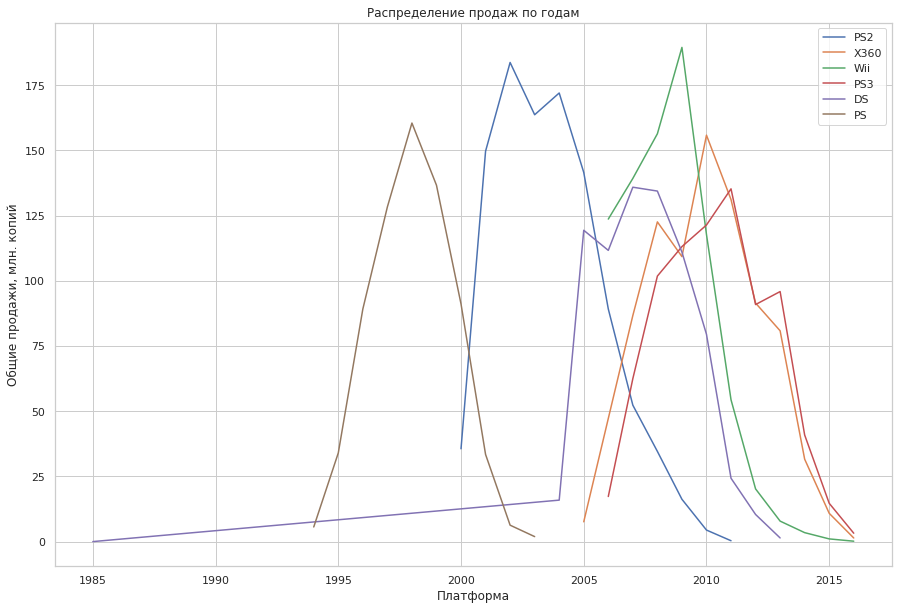

In [22]:
for platform in total_sales_leaders.index:
    source = (data.query('platform == @platform')
              .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))
    source.reset_index(inplace=True)
    sns.lineplot(data=source, x='year_of_release', y='total_sales', label=platform)
    plt.xlabel('Платформа')
    plt.ylabel('Общие продажи, млн. копий')
    plt.legend()
    plt.title('Распределение продаж по годам')
plt.show()  

С помощью графика мы можем ответить на вопрос *За какой характерный срок появляются новые и исчезают старые платформы?*  

Все платформы, кроме DS живут примерно 10 лет. Срок работы DS больше - около 28 лет, но активная жизнь платформы продлилась примерно 10 лет, как и у других.  

Таким образом, мы можем обозначить *актуальный период* как 10 лет. Более старые данные при анализе в дальнейшем учитывать не будем.


#### Выбор потенциально прибыльных платформ

Нам нужно ответить на вопрос *Какие платформы лидируют по продажам, растут или падают?*, а также выбрать несколько потенциально прибыльных платформ.

Начем с создания среза с актуальными данными:

In [23]:
actual_data = data.query('year_of_release > 2006')

Посмотрим, какие платформы лидируют по продажам:

In [24]:
sales_actual_data = (actual_data
                     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .sort_values(by='total_sales', ascending=False))
sales_actual_data.reset_index(inplace=True)
display(sales_actual_data)

,platform,total_sales
0,X360,821.55
1,PS3,779.45
2,Wii,689.84
3,DS,496.83
4,PS4,265.79
5,3DS,244.54
6,PSP,159.03
7,XOne,145.05
8,PC,142.22
9,PS2,107.92


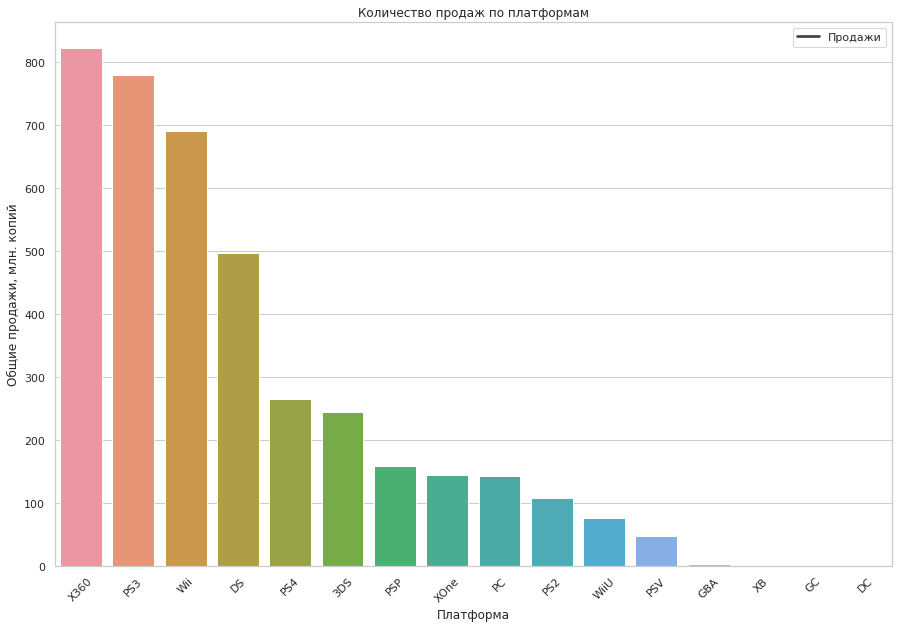

In [25]:
sns.barplot(x='platform', y='total_sales', data=sales_actual_data, dodge=True)
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн. копий')
plt.legend(['Продажи'])
plt.xticks(rotation=45)
plt.show()

Итак, можно выделить три платформы с самым высоким уровнем продаж: X360 от Microsoft, PS3 от Sony и Wii от Nintendo.  

Теперь посмотрим на динамику продаж:

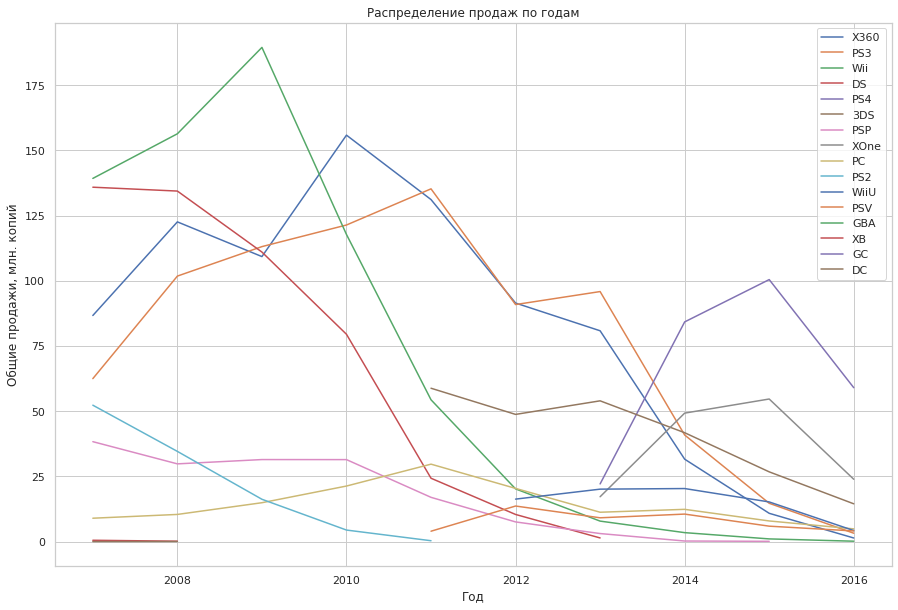

In [26]:
for platform in sales_actual_data['platform']:
    source = (actual_data.query('platform == @platform')
              .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))
    source.reset_index(inplace=True)
    sns.lineplot(data=source, x='year_of_release', y='total_sales', label=platform)
    plt.xlabel('Год')
    plt.ylabel('Общие продажи, млн. копий')
    plt.legend()
    plt.title('Распределение продаж по годам')
plt.show() 

На графике мы видим, что продажи падают по всем платформам, но самые прибыльные из них за последнее время - **PS4** и **XOne**.  
**3DS** за 2014-2016 годы остается на третьем месте по объему продаж, но ее доля падает уже с 2013 года, поэтому ее включать в список потенциально прибыльных не будем.

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Text(0.5, 1.0, 'Глобальные продажи игр в разбивке по платформам')

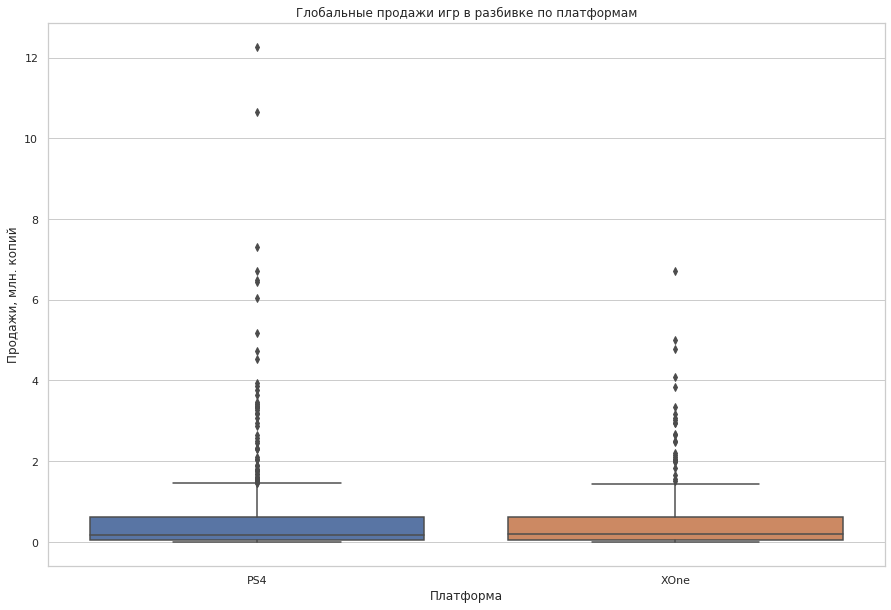

In [27]:
platforms = ['PS4', 'XOne']
perspective_platforms_data = actual_data.query('platform == @platforms')
                              
sns.boxplot(x="platform", y="total_sales", data=perspective_platforms_data)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.title('Глобальные продажи игр в разбивке по платформам')

Посмотрим на средние продажи игр для каждой платформы:

In [28]:
perspective_platforms_data.groupby('platform')['total_sales'].mean()

platform
PS4     0.678036
XOne    0.587247
Name: total_sales, dtype: float64

Как видно, средние продажи выше у платформы **PS4**: 678 тыс. копий против 587 тыс. у **XOne**. 

Из графика "ящик с усами" также можно сделать вывод, что чаще популярные игры выходят именно на **PS4** - отдельные игры продаются в количестве более 10 млн. копий.

#### Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы 

В этом пункте нужно построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

Посмотрим, как влияют отзывы пользователей и критиков на продажи игр на X360. Мы выбрали эту платформу, так как среди актуальных данных о продажах игр за последние 10 лет именно она самая популярная.

Сначала построим диаграмму рассеяния для анализа влияния отзывов критиков и посчитаем корреляцию:

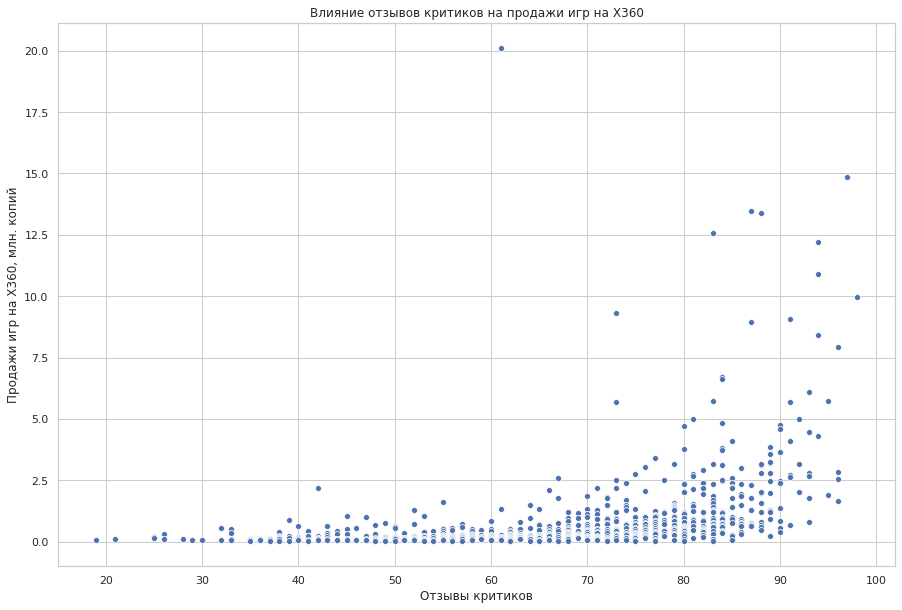

In [29]:
x360_data = actual_data.query('platform == "X360"')
sns.scatterplot(data=x360_data, x="critic_score", y="total_sales")
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи игр на X360, млн. копий')
plt.title('Влияние отзывов критиков на продажи игр на X360')
plt.show()

In [30]:
x360_data['critic_score'].corr(x360_data['total_sales'])

0.3956270281195354

Как видно на диаграмме рассеяния, чем выше отзывы критиков, тем больше объем продаж игр. Значение коэффициента корреляции - 0.39 - это подтверждает.  

Теперь построим диаграмму рассеяния для анализа влияния отзывов пользователей и посчитаем корреляцию:

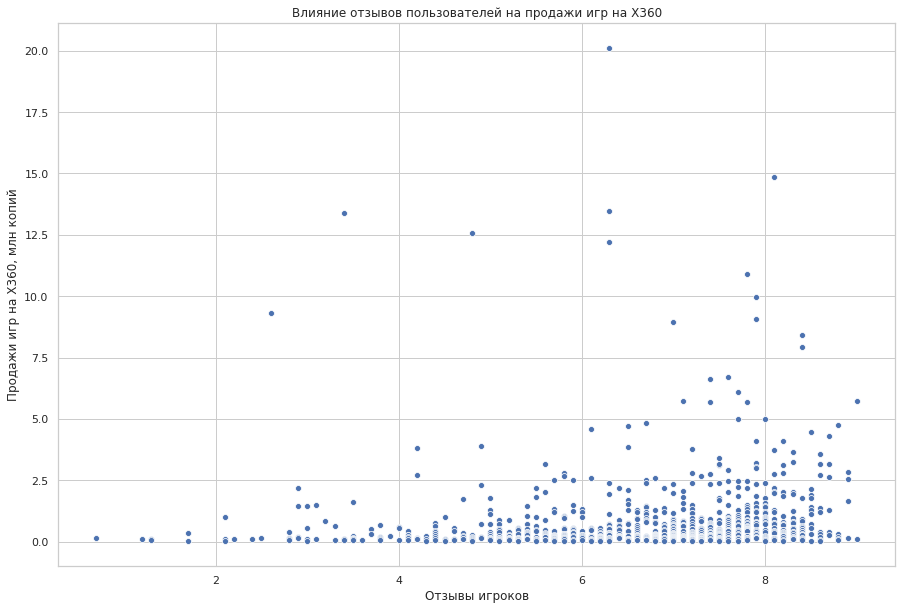

In [31]:
sns.scatterplot(data=x360_data, x="user_score", y="total_sales")
plt.xlabel('Отзывы игроков')
plt.ylabel('Продажи игр на X360, млн копий')
plt.title('Влияние отзывов пользователей на продажи игр на X360')
plt.show()

In [32]:
x360_data['user_score'].corr(x360_data['total_sales'])

0.11364889605594222

Значение коэффициента корреляции - 0.11, это означает, что зависимость между отзывами игроков и продажами есть, хотя и не очень сильная. График это подтверждает. Мы видим, что отдельные игры хорошо продаются даже несмотря на пользовательский рейтинг ниже 6 баллов.

На основе этих наблюдений сформулируем выводы:

1. Между продажами и отзывами критиков есть связь: чем лучше отзывы, тем больше продаж;
2. Отзывы игроков влияют на объем продаж, но не очень сильно: есть игры с большим количеством продаж, но не очень хорошими отзывами.

#### Анализ влияния отзывов пользователей и критиков на продажи в целом

Необходимо соотнести сделанные выводы с продажами игр на других платформах. Для этого посмотрим на корреляции для всех актуальных платформ:

In [33]:
actual_platforms_data = actual_data[['platform', 'critic_score', 'user_score', 'total_sales']]
actual_platforms_data.reset_index(inplace=True, drop=True)

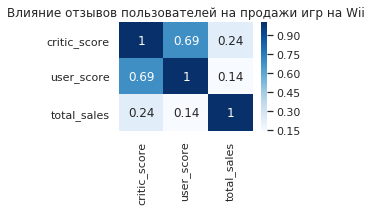

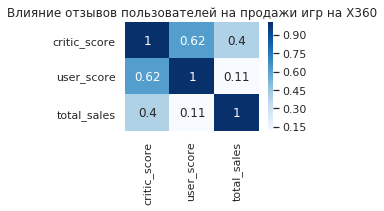

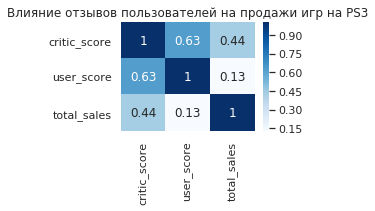

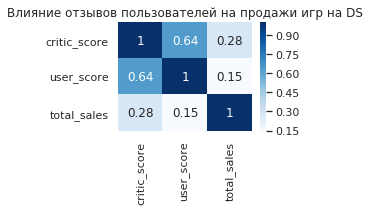

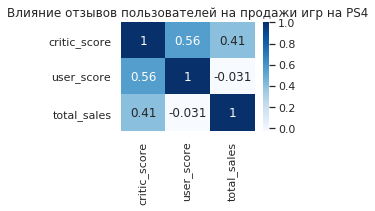

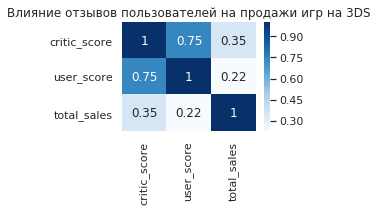

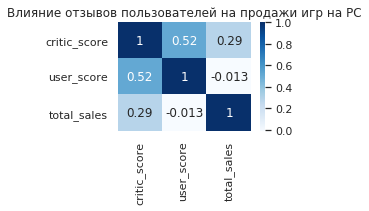

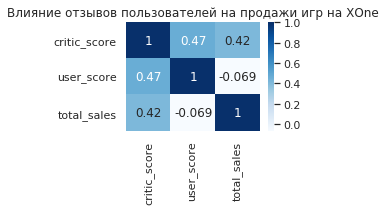

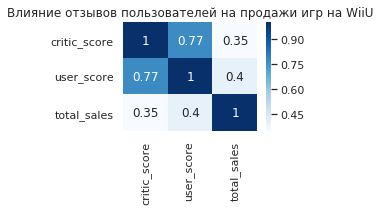

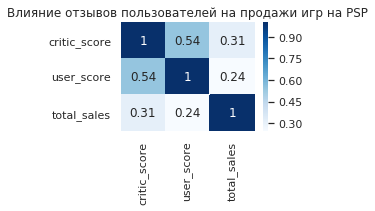

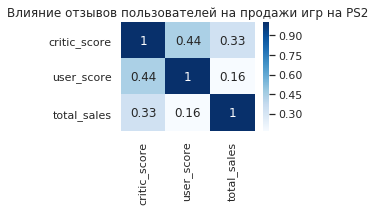

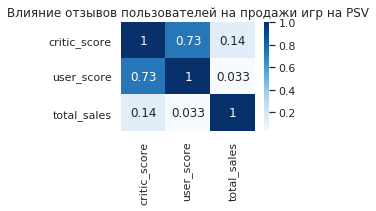

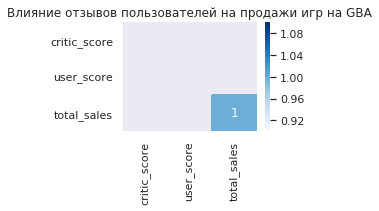

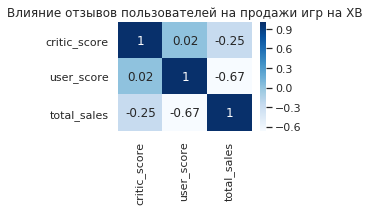

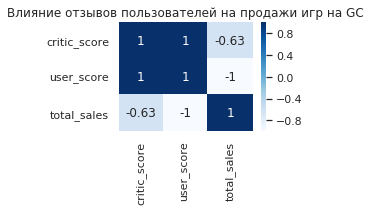

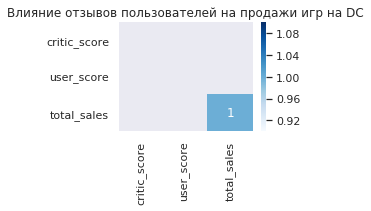

In [34]:
for platform in actual_data['platform'].unique():
    
    scatterplot_source = actual_platforms_data.query('platform == @platform')
    sns.set(rc={"figure.figsize": (3, 2)})
    sns.heatmap(data=scatterplot_source.corr(), annot=True, cmap='Blues')
    plt.title(f'Влияние отзывов пользователей на продажи игр на {platform}')
    plt.show()

Изучив значения коэффициентов корреляции, мы можем подтвердить ранее сделанные выводы: объем продаж и правда зависит от отзывов критиков - чем лучше отзывы, тем больше пролдаж.   

Однако, между продажами и отзывами пользователей корреляция не такая большая.

In [35]:
print(actual_data.query('platform == "XB"').shape[0])
print(actual_data.query('platform == "GC"').shape[0])

4
4


#### Анализ общего распределения игр по жанрам. 

В этом пункте нужно ответить на вопросы:
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

Сначала посмотрим на распределение игр по жанрам:

In [36]:
genre_data = (actual_data
                .pivot_table(index='genre', values='total_sales', aggfunc='count')
                .sort_values(by='total_sales', ascending=False))
genre_data.reset_index(inplace=True)
display(genre_data)

,genre,total_sales
0,Action,2198
1,Misc,1145
2,Sports,1124
3,Adventure,952
4,Role-Playing,886
5,Shooter,668
6,Simulation,549
7,Racing,487
8,Fighting,358
9,Strategy,351


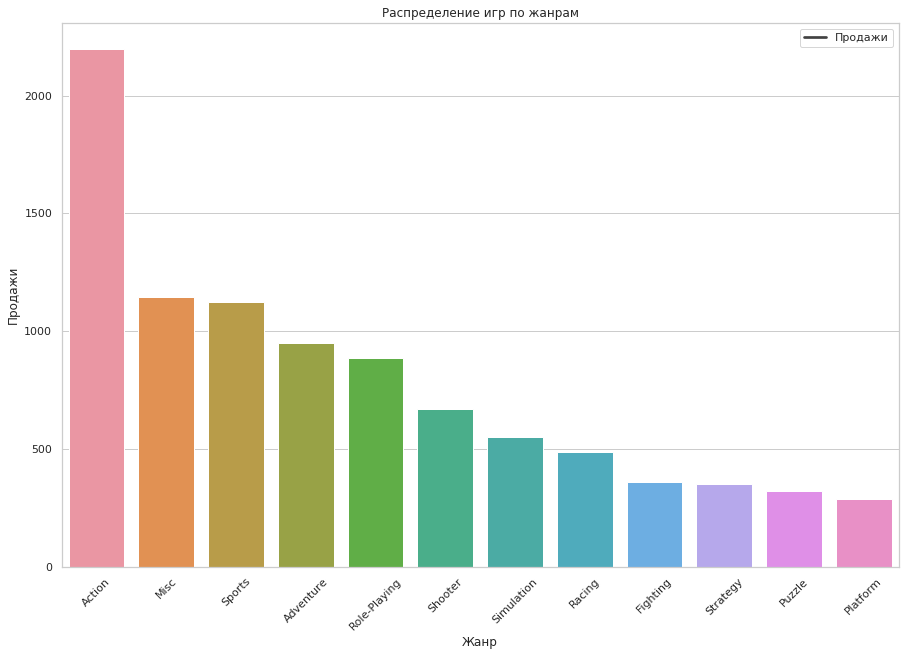

In [37]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.set_style("whitegrid")
sns.barplot(x='genre', y='total_sales', data=genre_data, dodge=True)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.legend(['Продажи'])
plt.xticks(rotation=45)
plt.show()

Самые прибыльные жанры - **action, sports** и игры без какого-то определенного жанра **(misc)**. В принципе, результат ожидаемый, учитывая успех, например, ГТА в жанре **action** или популярность спортивных симуляторов вроде FIFA. Второе место занимают казуальные игры разных жанров, популярные, например, среди домохозяек.  

Жанр **action** сильно выделяется среди остальных - такие игры продаются почти вдвое лучше ближайшего конкурента **(misc)**: 2198 млн. копий против 1145.  

Жанры с низкими продажами тоже выделяются: на графике это особенно хорошо видно - игры жанров **fighting, strategy, puzzle** и **platform** продаются плохо - за актуальный период (а это 10 лет!) продано всего 358 млн. копий игр жанра **fighting**, а остальных и того меньше. Самый непопулярный жанр - **platform**. Это может быть связано с тем, что игры этого жанра устарели.

### Вывод

- Больше всего игр было выпущено в 2008-2009 годах (1427 и 1426), потом начался постепенный спад в в 2010-2011 годах. В 2012 году количество выпущенных игр резко упало на 42.5% до 653;
- Можно сказать, что данные за старые периоды не так важны, так как прогноз нужно строить на актуальных данных;
- Средний жизненный цикл платформы составляет 10 лет;
- Самые потенциально прибыльные платформы - **PS4** и **XOne**;
- Отзывы критиков влияют на объем продаж: чем лучше отзывы, тем выше продажи;
- Отзывы пользователей не сильно влияют на объем продаж. Это может быть связано с тем, что они менее объективны;
- Самый успешный жанр - **action**; самый непопулярный - **platform**.

<div id='id-4'/>

### Составление портрета пользователя каждого региона

На этом шаге нужно определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.


Также нужно ответить на вопрос: *Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

#### Выявление самых популярных платформ в регионах NA, EU, JP

Для определения самых популярных платформ выведем на экран сводные таблицы с топ-5 по каждому региону, а также создадим гистограммы:

,platform,na_sales
0,X360,553.68
1,Wii,416.01
2,PS3,381.29
3,DS,273.98
4,PS4,108.74


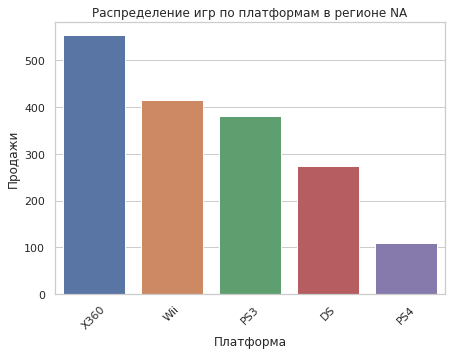

,platform,eu_sales
0,PS3,319.83
1,X360,257.05
2,Wii,214.70
3,PS4,141.09
4,DS,119.92


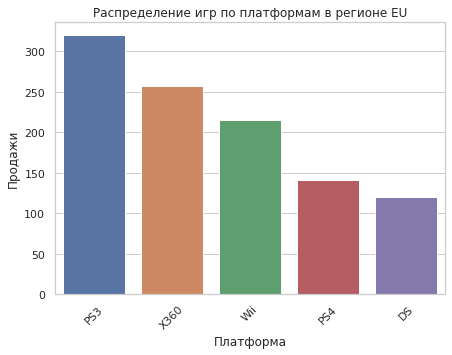

,platform,jp_sales
0,DS,102.93
1,3DS,100.62
2,PS3,78.33
3,PSP,66.24
4,Wii,59.13


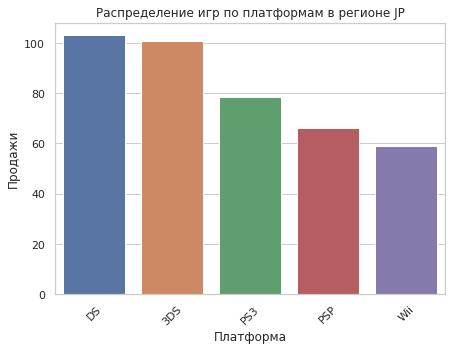

In [38]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.set_style("whitegrid")
local_sales = {'na_sales' : 'NA', 'eu_sales' : 'EU', 'jp_sales' : 'JP'}

for key, value in local_sales.items():
    
    local_platforms_top = (actual_data.pivot_table(index='platform', values=key, aggfunc='sum')
                .sort_values(by=key, ascending=False)).head()
    local_platforms_top.reset_index(inplace=True)
    display(local_platforms_top)
    sns.barplot(x='platform', y=key, data=local_platforms_top, dodge=True)
    plt.title(f'Распределение игр по платформам в регионе {value}')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.xticks(rotation=45)
    plt.show()

Как мы видим, в каждом регионе свои лидеры продаж: 
- В Северной Америке это **X360** от Microsoft (более 553 млн. продаж) - есть мнение, что во многом благодаря их отличному мультиплееру и шутерам;
- В Европе это **PS3** - платформа, известная тем, что она начала размывать границы между устройствами, которые мы используем для потребления контента: ее можно использовать как для игр, так и для просмотра фильмов, например, благодаря поддержке blue-ray. В Европе уже давно руководствуются принципами рационального потребления, поэтому популярность **PS3** неудивительна;
- В Японии лидирует **DS** от Nintendo: компактная платформа, играть на которой можно где угодно. 

#### Выявление самых популярных жанров в регионах NA, EU, JP

Аналогично поступим для выявления самых популярных жанров в регионах:

,genre,na_sales
0,Action,492.17
1,Shooter,350.11
2,Sports,323.86
3,Misc,259.16
4,Role-Playing,175.41


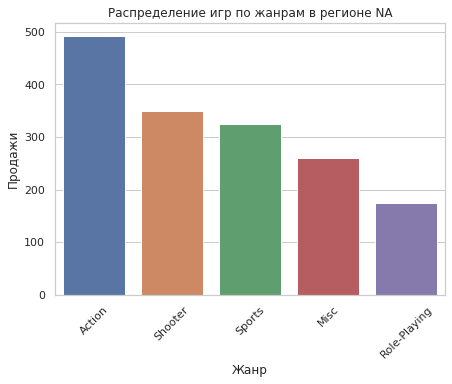

,genre,eu_sales
0,Action,335.67
1,Shooter,230.16
2,Sports,211.49
3,Misc,127.62
4,Racing,104.63


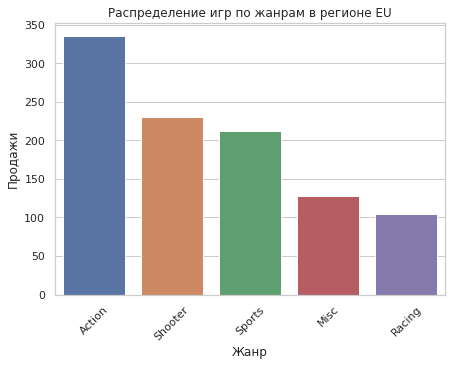

,genre,jp_sales
0,Role-Playing,150.55
1,Action,96.29
2,Misc,48.79
3,Sports,40.28
4,Adventure,26.91


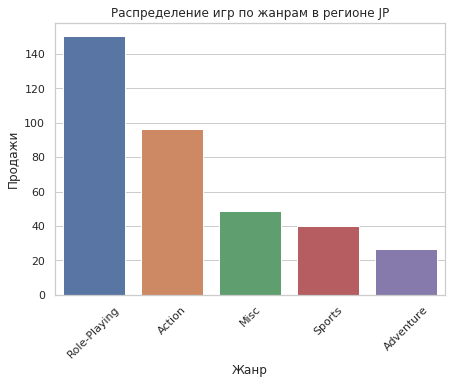

In [39]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.set_style("whitegrid")
local_sales = {'na_sales' : 'NA', 'eu_sales' : 'EU', 'jp_sales' : 'JP'}

for key, value in local_sales.items():
    
    local_data_top = (actual_data.pivot_table(index='genre', values=key, aggfunc='sum')
                .sort_values(by=key, ascending=False)).head()
    local_data_top.reset_index(inplace=True)
    display(local_data_top)
    sns.barplot(x='genre', y=key, data=local_data_top, dodge=True)
    plt.title(f'Распределение игр по жанрам в регионе {value}')
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.xticks(rotation=45)
    plt.show()

В Северной Америке и Европе топ-5 очень похожи: лидируют **action** игры, тогда как в Японии они занимают второе место по популярности - в целом, это ожидаемо, учитывая, сколько успешных игр этого жанра выходило на рынок за последние 10 лет.
В Японии лидируют игры жанра **RPG (role-playing games)** - это можно объяснить тем, что японцы и сами выпускают значительное количество таких игр: Final Fantasy, например.

#### Оценка влияния рейтинга ESRB на продажи в отдельном регионе

Для того, чтобы ответить на вопрос *Влияет ли рейтинг ESRB на продажи в отдельном регионе?*, построим графики:

,rating,na_sales
0,E,663.99
1,M,546.55
2,T,371.32
3,E10+,287.61
4,EC,1.32
5,RP,0.00


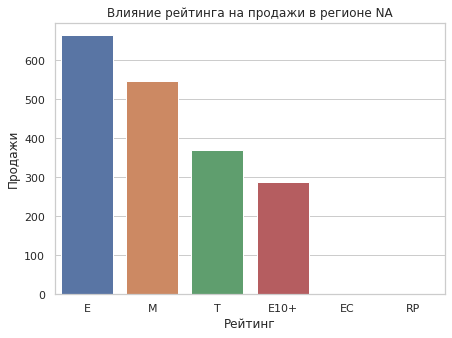

,rating,eu_sales
0,E,393.08
1,M,385.86
2,T,217.89
3,E10+,162.75
4,RP,0.03
5,EC,0.00


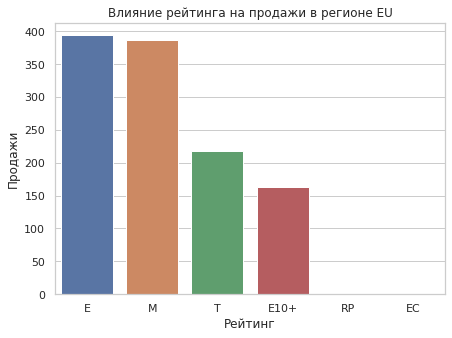

,rating,jp_sales
0,E,95.06
1,T,74.74
2,M,41.09
3,E10+,31.91
4,EC,0.00
5,RP,0.00


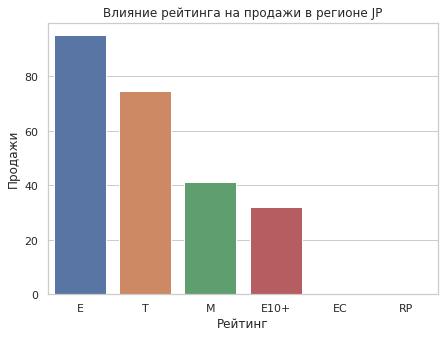

In [40]:
for key, value in local_sales.items():
    
    local_data_ratings = (actual_data.pivot_table(index='rating', values=key, aggfunc='sum')
                .sort_values(by=key, ascending=False))
    local_data_ratings.reset_index(inplace=True)
    display(local_data_ratings)
    sns.barplot(x='rating', y=key, data=local_data_ratings, dodge=True)
    plt.title(f'Влияние рейтинга на продажи в регионе {value}')
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи')
    plt.show()

Во всех регионах лучше всего продаются игры с рейтингом **E** - без возрастных ограничений. В Европе и Северной Америке на втором месте по продажам находятся игры с рейтингом **M** - 17+, тогда как в Японии - **T** - 13+. Возможно, в среднем игроки в Японии моложе, чем в других регионах, но данных о возрасте пользователей у нас нет, чтобы проверить эту гипотезу.  

Таким образом, можно ответить на вопрос утвердительно: рейтинг ESRB влияет на продажи в отдельном регионе: лучше всего продаются игры без возрастных ограничений, но второе место по продажам в Японии отличается от других регионов, что говорит о том, что портрет игрока все-таки меняется в зависимости от региона.

### Вывод

Проанализировав портрет игрока, мы можем сделать следующие выводы:
- В каждом регионе самые популярные игровые платформы отличаются: в Северной Америке это **X360** (более 553 млн. продаж), в Европе - **PS3** (более 319 млн. проданных копий), в Японии - **DS** (103 млн.);
- В Северной Америке и Европе топ-5 очень похожи: лидируют **action** игры, тогда как в Японии - **RPG**;
- Во всех регионах лучше всего продаются игры с рейтингом **E** - для игроков всех возрастов.

<div id='id-5'/>

### Проверка гипотез

Нужно проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


#### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для начала сформулируем нулевую гипотезу $H_0$. Она должна быть создана, исходя из принципов отсутствия различия, соответственно, звучать она будет так:  

> Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.  

Альтернативная гипотеза $H_1$ противопоставляется нулевой:

> Средние пользовательские рейтинги платформ **Xbox One** и **PC** различаются.
    
  
Пороговое значение *alpha* (критический уровень значимости) установим на уровне 5%.  

Создадим срезы для платформ и проверим гипотезу:

In [41]:
xone_ratings = actual_data.query('platform == "XOne"')
pc_ratings = actual_data.query('platform == "PC"')

In [42]:
#У нас выборка, а не генеральная совокупность, так что параметр дельты степеней свободы ddof указываем равным 1
xone_var = xone_ratings['user_score'].var(ddof=1)
pc_var = pc_ratings['user_score'].var(ddof=1)
print(f'Дисперсия для X One равна: {xone_var}')
print(f'Дисперсия для PC равна: {pc_var}')

Дисперсия для X One равна: 1.9069968429360695
Дисперсия для PC равна: 2.3403339171044952


In [68]:
results = (st.ttest_ind(xone_ratings['user_score'], 
                       pc_ratings['user_score'], 
                       nan_policy='omit',
                       equal_var=False))


print('p-значение:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Мы не можем отвергнуть нулевую гипотезу')   

p-значение: 0.044018928589263005
Отвергаем нулевую гипотезу


P-value равняется примерно 4.4% и критический уровень значимости выше, поэтому мы отклоняем нулевую гипотезу.

#### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

Для начала сформулируем нулевую гипотезу $H_0$. Она должна быть создана, исходя из принципов отсутствия различия, соответственно, звучать она будет так:  

> Средние пользовательские рейтинги жанров **Action** и **Sports** одинаковые.  

Альтернативная гипотеза $H_1$ противопоставляется нулевой:

> Средние пользовательские рейтинги жанров **Action** и **Sports** различаются.
    
  
Пороговое значение *alpha* (критический уровень значимости) установим на уровне 5%.  

Создадим срезы для платформ и проверим гипотезу:

In [44]:
action_ratings = actual_data.query('genre == "Action"')
sports_ratings = actual_data.query('genre == "Sports"')

In [45]:
action_var = action_ratings['user_score'].var(ddof=1)
sports_var = sports_ratings['user_score'].var(ddof=1)
print(f'Дисперсия для жанра Action равна: {action_var}')
print(f'Дисперсия для жанра Sports равна: {sports_var}')

Дисперсия для жанра Action равна: 1.830189395225529
Дисперсия для жанра Sports равна: 2.8140348567270714


In [46]:
results = (st.ttest_ind(action_ratings['user_score'], 
                       sports_ratings['user_score'], 
                       nan_policy='omit',
                       equal_var=False))

print('p-значение:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Мы не можем отвергнуть нулевую гипотезу') 

p-значение: 4.5406655100578186e-11
Отвергаем нулевую гипотезу


Вероятность получить одинаковые пользовательские рейтинги жанров **Action** и **Sports** крайне мала, поэтому мы отвергаем нулевую гипотезу.

### Вывод

После проверки двух гипотез можно сделать выводы:

- Средние пользовательские рейтинги платформ Xbox One и PC различаются;
- Средние пользовательские рейтинги жанров Action и Sports разные.

<div id='id-6'/>

### Общий вывод

- Самые продуктивные времена для игровой индустрии были в 2008 и 2019 годах: выпущено было 1427 и 1426 игр соответственно;
- Средний жизненный цикл платформы составляет 10 лет;
- Самые потенциально прибыльные платформы - **PS4** и **Xbox One**;
- Отзывы критиков влияют на объем продаж: чем лучше отзывы, тем выше продажи;
- Отзывы пользователей не сильно влияют на объем продаж. Это может быть связано с тем, что они менее объективны;
- Самые популярные жанры в Европе и Северной Америке - **Action** и **Shooter**, а в Японии - **RPG**;
- Средние пользовательские рейтинги платформ **Xbox One** и **PC** разные;
- Средние пользовательские рейтинги жанров **Action** и **Sports** разные.